In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.nonparametric.api as smnp

In [16]:
react=pd.read_table('react_raw.csv', index_col=False)
# react.set_index('sub', inplace=True)

In [17]:
react=react[react['cond']==1]
react.drop('cond', axis=1, inplace=True)
react['zero']=0

In [18]:
def distance(array, x1, y1, x2, y2, new_col):
    dx=array[x2]-array[x1]
    dy=array[y2]-array[y1]
    array[new_col]=np.sqrt(dx**2+dy**2)
    return array

In [19]:
distance(react, 'x', 'y', 'x1', 'y1', 't1_orig_dist')
distance(react, 'x', 'y', 'x2', 'y2', 't2_orig_dist')
distance(react, 'x1', 'y1', 'x2', 'y2', 't2_t1_dist')
distance(react, 'x', 'y', 'x3', 'y3', 't3_orig_dist')
distance(react, 'x2', 'y2', 'x3', 'y3', 't3_t2_dist')

,sub,x,y,x1,y1,x2,y2,x3,y3,zero,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t2_dist
0,401,-46,-193,-47,-200,-74,-158,-47,-159,0,7.071068,44.821870,49.929951,34.014703,27.018512
1,401,258,-104,250,-87,239,-78,255,-82,0,18.788294,32.202484,14.212670,22.203603,16.492423
2,401,-236,265,-237,288,-248,301,-243,298,0,23.021729,37.947332,17.029386,33.734256,5.830952
3,401,-123,200,-126,225,-116,182,-141,212,0,25.179357,19.313208,44.147480,21.633308,39.051248
4,401,-33,-289,-27,-255,-110,125,-88,-126,0,34.525353,421.099751,388.958867,172.029067,251.962299
5,401,-177,-172,-213,-179,-252,-3,-215,-181,0,36.674242,184.894565,180.269243,39.051248,181.804840
6,401,-225,142,-186,128,-116,221,132,221,0,41.436699,134.617978,116.400172,365.636431,248.000000
7,401,133,93,176,71,241,82,240,85,0,48.301139,108.558740,65.924199,107.298649,3.162278
8,401,163,180,142,135,165,137,148,117,0,49.658836,43.046487,23.086793,64.761099,26.248809
9,401,-185,4,-239,-6,-252,-76,-250,-91,0,54.918121,104.350371,71.196910,115.108644,15.132746


In [20]:
distance(react, 'x', 'y', 'zero', 'zero', 'orig_center_dist')
distance(react, 'x1', 'y1', 'zero', 'zero', 't1_center_dist')
distance(react, 'x2', 'y2', 'zero', 'zero', 't2_center_dist')
distance(react, 'x3', 'y3', 'zero', 'zero', 't3_center_dist')

,sub,x,y,x1,y1,x2,y2,x3,y3,zero,t1_orig_dist,t2_orig_dist,t2_t1_dist,t3_orig_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist
0,401,-46,-193,-47,-200,-74,-158,-47,-159,0,7.071068,44.821870,49.929951,34.014703,27.018512,198.406149,205.448290,174.470628,165.801086
1,401,258,-104,250,-87,239,-78,255,-82,0,18.788294,32.202484,14.212670,22.203603,16.492423,278.172608,264.705497,251.406046,267.860038
2,401,-236,265,-237,288,-248,301,-243,298,0,23.021729,37.947332,17.029386,33.734256,5.830952,354.853491,372.978552,390.006410,384.516580
3,401,-123,200,-126,225,-116,182,-141,212,0,25.179357,19.313208,44.147480,21.633308,39.051248,234.795656,257.877878,215.824002,254.607541
4,401,-33,-289,-27,-255,-110,125,-88,-126,0,34.525353,421.099751,388.958867,172.029067,251.962299,290.877981,256.425428,166.508258,153.687996
5,401,-177,-172,-213,-179,-252,-3,-215,-181,0,36.674242,184.894565,180.269243,39.051248,181.804840,246.805592,278.226526,252.017857,281.044480
6,401,-225,142,-186,128,-116,221,132,221,0,41.436699,134.617978,116.400172,365.636431,248.000000,266.062023,225.787511,249.593670,257.419890
7,401,133,93,176,71,241,82,240,85,0,48.301139,108.558740,65.924199,107.298649,3.162278,162.289864,189.781453,254.568262,254.607541
8,401,163,180,142,135,165,137,148,117,0,49.658836,43.046487,23.086793,64.761099,26.248809,242.835335,195.931110,214.462118,188.661072
9,401,-185,4,-239,-6,-252,-76,-250,-91,0,54.918121,104.350371,71.196910,115.108644,15.132746,185.043238,239.075302,263.210942,266.046988


In [21]:
def get_quad(array, x, y, new_col):
    for sub, row in array.iterrows():
        if (array.loc[sub, x]<0) & (array.loc[sub, y]<0):
                array.loc[sub, new_col]=3
        elif (array.loc[sub, x]<0) & (array.loc[sub, y]>0):
                array.loc[sub, new_col]=2    
        elif (array.loc[sub, x]>0) & (array.loc[sub, y]<0):
                array.loc[sub, new_col]=4    
        elif (array.loc[sub, x]>0) & (array.loc[sub, y]>0):
                array.loc[sub, new_col]=1    
        else: array.loc[sub, new_col]=np.nan    
    return array

In [22]:
get_quad(react, 'x', 'y', 'loc_quad')
get_quad(react, 'x1', 'y1', 'loc1_quad')
get_quad(react, 'x2', 'y2', 'loc2_quad')
get_quad(react, 'x3', 'y3', 'loc3_quad')

,sub,x,y,x1,y1,x2,y2,x3,y3,zero,...,t3_orig_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist,loc_quad,loc1_quad,loc2_quad,loc3_quad
0,401,-46,-193,-47,-200,-74,-158,-47,-159,0,...,34.014703,27.018512,198.406149,205.448290,174.470628,165.801086,3.0,3.0,3.0,3.0
1,401,258,-104,250,-87,239,-78,255,-82,0,...,22.203603,16.492423,278.172608,264.705497,251.406046,267.860038,4.0,4.0,4.0,4.0
2,401,-236,265,-237,288,-248,301,-243,298,0,...,33.734256,5.830952,354.853491,372.978552,390.006410,384.516580,2.0,2.0,2.0,2.0
3,401,-123,200,-126,225,-116,182,-141,212,0,...,21.633308,39.051248,234.795656,257.877878,215.824002,254.607541,2.0,2.0,2.0,2.0
4,401,-33,-289,-27,-255,-110,125,-88,-126,0,...,172.029067,251.962299,290.877981,256.425428,166.508258,153.687996,3.0,3.0,2.0,3.0
5,401,-177,-172,-213,-179,-252,-3,-215,-181,0,...,39.051248,181.804840,246.805592,278.226526,252.017857,281.044480,3.0,3.0,3.0,3.0
6,401,-225,142,-186,128,-116,221,132,221,0,...,365.636431,248.000000,266.062023,225.787511,249.593670,257.419890,2.0,2.0,2.0,1.0
7,401,133,93,176,71,241,82,240,85,0,...,107.298649,3.162278,162.289864,189.781453,254.568262,254.607541,1.0,1.0,1.0,1.0
8,401,163,180,142,135,165,137,148,117,0,...,64.761099,26.248809,242.835335,195.931110,214.462118,188.661072,1.0,1.0,1.0,1.0
9,401,-185,4,-239,-6,-252,-76,-250,-91,0,...,115.108644,15.132746,185.043238,239.075302,263.210942,266.046988,2.0,3.0,3.0,3.0


In [ ]:
means=pd.DataFrame(react.groupby(['sub'])['t1_orig_dist', 't2_orig_dist', 't3_orig_dist', 't3_react_dist'].mean())
means.reset_index(inplace=True)

In [ ]:
sns.distplot(react['t3_orig_dist'], color='Green')
sns.distplot(react['t3_react_dist'], color='Orange')


In [ ]:
react['t3_orig_dist'].hist(cumulative=True, normed=True, alpha=1, color='Green')
react['t3_react_dist'].hist(cumulative=True, normed=True, alpha=.5, color='Orange')


In [ ]:
sns.distplot(react['t3_orig_dist'], color='Green',
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
sns.distplot(react['t3_react_dist'], color='Orange',
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))


In [ ]:
finaldist=pd.melt(react, id_vars=['x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3',
                                  't1_orig_dist', 't2_orig_dist'],
                                  value_vars=['t3_orig_dist', 't3_react_dist'],
                  var_name='final_mem',value_name='final_dist')

In [ ]:
viosplit=sns.violinplot(x="final_mem", y="final_dist", data=finaldist, palette="Set2")

In [ ]:
bar=sns.barplot(x="final_mem", y="final_dist", data=finaldist, palette="Set2")

In [ ]:
strip=sns.factorplot(x="final_mem", y="final_dist", 
               data=finaldist, kind="strip", jitter=True, palette='Set2');

In [ ]:
strip=sns.factorplot(x="final_mem", y="final_dist", 
               data=finaldist, kind="swarm", palette='Set2');

In [ ]:
sns.lmplot('x3', # Horizontal axis
           'y3', # Vertical axis
           data=react, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

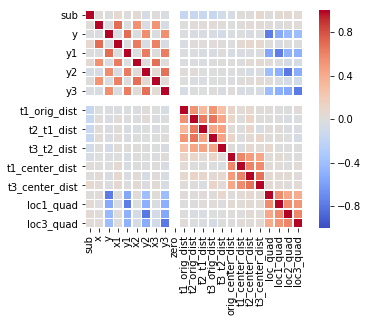

In [10]:
sns.heatmap(react.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm',
            square=True, linewidths=.5)

In [9]:
react.corr()

,sub,x,y,x1,y1,x2,y2,x3,y3,zero,...,t3_orig_dist,t3_t2_dist,orig_center_dist,t1_center_dist,t2_center_dist,t3_center_dist,loc_quad,loc1_quad,loc2_quad,loc3_quad
sub,1.000000,0.021667,-0.010562,0.071908,0.003382,0.047733,-0.052076,0.012054,-0.023917,NaN,...,-0.148878,-0.084081,-0.048408,0.022443,0.012479,0.075041,0.008622,0.050906,0.060622,0.044339
x,0.021667,1.000000,-0.019562,0.696851,-0.010411,0.546068,-0.036350,0.526233,-0.044643,NaN,...,0.033731,0.018982,-0.005069,0.015449,0.032759,0.034000,0.021566,-0.010472,0.021283,0.024410
y,-0.010562,-0.019562,1.000000,-0.028941,0.701556,-0.021756,0.555126,-0.013613,0.549152,NaN,...,-0.037079,-0.068590,-0.027800,-0.000951,-0.032371,-0.016832,-0.774170,-0.536055,-0.432773,-0.413175
x1,0.071908,0.696851,-0.028941,1.000000,0.005274,0.639012,-0.035105,0.612068,-0.045112,NaN,...,0.025826,0.022572,-0.005923,0.056919,0.078038,0.068637,0.015036,-0.038869,0.008700,0.006507
y1,0.003382,-0.010411,0.701556,0.005274,1.000000,-0.006329,0.637705,0.013173,0.632693,NaN,...,-0.034929,0.010039,-0.048222,-0.033753,-0.025752,-0.010189,-0.550239,-0.766200,-0.491821,-0.477618
x2,0.047733,0.546068,-0.021756,0.639012,-0.006329,1.000000,0.019159,0.690507,0.017580,NaN,...,0.003980,0.008621,0.006269,0.004132,0.042036,0.048238,0.030120,-0.001028,-0.059667,-0.046878
y2,-0.052076,-0.036350,0.555126,-0.035105,0.637705,0.019159,1.000000,0.057268,0.681290,NaN,...,-0.007505,0.007361,-0.002537,-0.008039,-0.054171,-0.017610,-0.403474,-0.498598,-0.792015,-0.521627
x3,0.012054,0.526233,-0.013613,0.612068,0.013173,0.690507,0.057268,1.000000,0.046396,NaN,...,-0.007801,-0.005492,-0.022780,0.015551,0.023993,0.043006,0.020690,-0.025129,-0.072845,-0.079884
y3,-0.023917,-0.044643,0.549152,-0.045112,0.632693,0.017580,0.681290,0.046396,1.000000,NaN,...,0.014656,-0.034886,0.018671,-0.034858,-0.043304,-0.041625,-0.409534,-0.492870,-0.541612,-0.787508
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def doKMeans(df, num_clusters):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.x, df.y, marker='.', alpha=0.3)

    dfloc=df[['x2', 'y2']]
    
    model=KMeans(n_clusters=num_clusters)
    model.fit(dfloc)
    colorlist=['r', 'k', 'b', 'g']
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c=colorlist, alpha=0.5, linewidths=3, s=169)
#     ax.set_xlim([-97,-96.5])
#     ax.set_ylim([32.5,33])
    plt.show()
    return model

In [ ]:
doKMeans(react, 5)

In [23]:
react['update']=react['t3_t2_dist']<react['t3_orig_dist']

In [24]:
y=react['update'].map({True:1, False:0})

In [30]:
react.dropna(axis=1, inplace=True)

In [31]:
X=react.drop(['sub', 'zero','x', 'y', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 't3_orig_dist', 't3_t2_dist', 'update'], axis=1)
X.columns

Index(['t1_orig_dist', 't2_orig_dist', 't2_t1_dist', 'orig_center_dist',
       't1_center_dist', 't2_center_dist', 't3_center_dist'],
      dtype='object')

In [32]:
y_up=react['t3_t2_dist']
y_mem=react['t3_orig_dist']

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X,y_mem, test_size=.3)
forest_reg=RandomForestRegressor(max_depth=3)
forest_reg.fit(X_train, y_train)
# forest_reg.predict(X_test)
forest_reg.score(X_test, y_test)

In [40]:
X.columns

Index(['t1_orig_dist', 't2_orig_dist', 't2_t1_dist', 'orig_center_dist',
       't1_center_dist', 't2_center_dist', 't3_center_dist'],
      dtype='object')

In [39]:
forest_reg.feature_importances_

array([0.07646506, 0.81867981, 0.02477027, 0.01998845, 0.        ,
       0.00097593, 0.05912049])

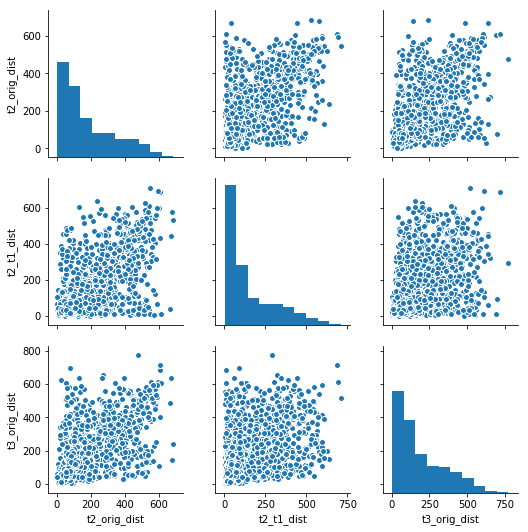

In [51]:
sns.pairplot(data=react[['t2_orig_dist', 't2_t1_dist', 't3_orig_dist']])

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X,y_up, test_size=.3)
forest_reg=RandomForestRegressor(max_depth=3)
forest_reg.fit(X_train, y_train)
# forest_reg.predict(X_test)
forest_reg.score(X_test, y_test)

0.23154809100064355

In [46]:
forest_reg.feature_importances_

array([0.03805972, 0.45526208, 0.38974203, 0.04229811, 0.01435658,
       0.04299487, 0.01728661])

In [47]:
X.columns

Index(['t1_orig_dist', 't2_orig_dist', 't2_t1_dist', 'orig_center_dist',
       't1_center_dist', 't2_center_dist', 't3_center_dist'],
      dtype='object')

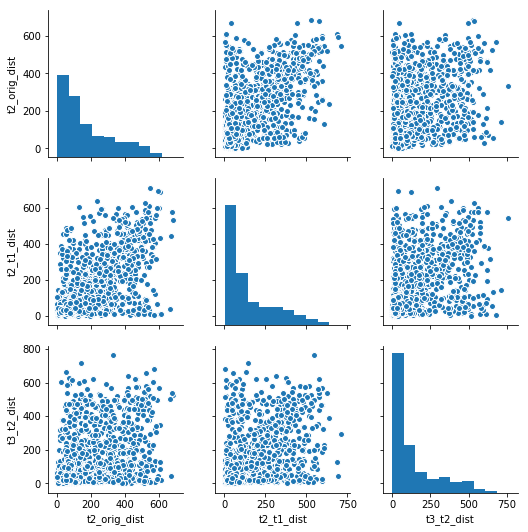

In [50]:
sns.pairplot(data=react[['t2_orig_dist', 't2_t1_dist', 't3_t2_dist']])